In [349]:
import numpy as np
import random
import matplotlib.pyplot as plt
import networkx as nx

In [350]:
# an agent-based model that simulates the formation of a workplace 
# network to determine whether individual differences in exploratory 
# and flexible tendencies cause people to become brokers within an 
# organization
#
# -----------------------------------------------------------------------
#
# Model Parameters:
#
# numAgents = number of players in the game
# numEncounters = the number of encounters
# 
# Each pair of agents has a "friendship weight" between 0 and 1,
# which will start as a randomly assigned value between 0 and .3
# (to represent each pair's initial affinity for each other)
#
# -----------------------------------------------------------------------

In [351]:
class Agent:
    'Class for all agents'

    def __init__(self, id):
        self.id = id

        # if we want a "likeability score":
        # self.likeabilityScore = {some way of randomly determining a likeability score}

        # "explore" or "exploit" ... let's say the default is exploit?
        # self.strategy = "exploit"


        # Kyle, Jennie, Adrienne, Ted, Quinn, Sareena, Shelly, Remy, Nava, Maura
        self.name = "Noname"


    def displayAgent(self):
        print("ID: \t", self.id)
        print("Name: \t", self.name)
        # print "likeabilityScore: \t", self.likeabilityScore
        # print "strategy: \t", self.strategy


In [352]:
# model parameters

numAgents = 10
numRounds = 20 # how many rounds?
names = ['Adrienne', 'Jennie', 'Kyle', 'Nava', 'Maura', 'Remy', 'Sareena', 'Shelly', 'Ted', 'Quinn']
# strategy for all agents is either "EXPLORE" or "EXPLOIT"
# (note: it would be easy to modify this so that each agent has its own strategy)
strategy = "EXPLORE" # You can change between explore and exploit



# Create the agents
network = []
for i in range(numAgents):
    network.append(Agent(i))

# set their names    
i = 0
for a in network:
    a.name = names[i]
    i += 1

In [353]:
# Set up a symmetric matrix with dimensions numAgents x numAgents
# to store the friendship weights between all pairs of employees
friendWeights = np.zeros((numAgents, numAgents))

# initialize the friendWeights to random scores between 0 and .3
for i in range(numAgents):
    for j in range (numAgents):
        if i < j:
            # sets the frienship weight of agents i and j to a random
            # number between 0 and .3, rounded to the nearest hundredth
            newWeight = random.randint(0, 30) * .01
            friendWeights[i][j] = newWeight
            friendWeights[j][i] = newWeight
            # last line keeps the matrix symmetric, so that 
            # row i, col j = row j, col i (friendship weight is symmetric)

In [354]:
# Increases the friendship weight between agent with ID agent1 and
# agent with ID agent2 by .1
def incFriendWeight(agent1, agent2):
    curr = friendWeights[agent1][agent2] 
    new = min(curr + .1, 1) # so that it can't be greater than 1
    friendWeights[agent1][agent2] = new
    friendWeights[agent2][agent1] = new 
    # last line keeps the matrix symmetric, so that 
    # row j, col k = row k, col j (friendship weight is symmetric)

# Decreases the friendship weight between agent with ID agent1 and 
# agent with ID agent2 by .1
def decFriendWeight(agent1, agent2):
    curr = friendWeights[agent1][agent2] 
    new = max(curr - .1, 0) # so that it can't be less than 0
    friendWeights[agent1][agent2] = new
    friendWeights[agent2][agent1] = new
    # last line keeps the matrix symmetric, so that 
    # row j, col k = row k, col j (friendship weight is symmetric)


# Returns the friendship weight of agents with IDs agent1 and agent2
def getFriendWeight(agent1, agent2):
    if friendWeights[agent1][agent2] == friendWeights[agent2][agent1]:
        return friendWeights[agent1][agent2]
    else: # these lines should never be reached
        return "ERROR! The matrix is not symmetric."


# Determines the result of agent with ID agent1 sending a message to agent with
# ID agent2
def chat(agent1, agent2):
    # not sure how this function should actually work so I just made up something
    # for now: for all pairs of agents, there's a 70 percent chance their 
    # friendship weight increases after interacting and a 30 percent chance it decreases
    if random.randint(0, 9) < 7: # this is true 70 percent of the time
        incFriendWeight(agent1, agent2)
    else: 
        decFriendWeight(agent1, agent2)
        



def printFriendMatrix(): ## Print out the friend matrix
    print(friendWeights)
   

In [355]:
# Each agent sends one message in each round: in exploration mode 
# mode it's more likely to be a message to a non-friend, whereas
# in exploitation mode it's more likely to be a message to a friend
for round in range(numRounds):

    for i in range(numAgents):

        # to simplify things for now (because I don't know exactly how we want 
        # to do this), this function is just randomly picking three other agents;
        # in exploitation mode the agent will message the one with the highest
        # friendship weight; in exploration mode the agent will message the one
        # with lowest friendship weight
        
        # list the other agents
        agents = list(range(numAgents)) # note: in Python3 this would be list(range(numAgents))
        agents.remove(i)

        # randomly pick three other agents (without replacement, so friends  will be 
        #a list with no duplicates)
        friends = random.sample(agents, 3)
        
        friend1Weight = getFriendWeight(i, friends[0])
        friend2Weight = getFriendWeight(i, friends[1])
        friend3Weight = getFriendWeight(i, friends[2])


        # "EXPLOIT" mode
        if strategy == "EXPLOIT": 
            # pick the friend with highest friendship weight
            bestWeight = max(friend1Weight, friend2Weight, friend3Weight)
        # "EXPLORE" mode
        else: 
            # pick the friend with lowest friendship weight
            bestWeight = min(friend1Weight, friend2Weight, friend3Weight)

        # The agent sends a message
        if friend1Weight == bestWeight:
            # the agent will message agent with ID friends[0]
            chat(i, friends[0])
        elif friend2Weight == bestWeight:
            # the agent will message agent with ID friends[1]
            chat(i, friends[1])
        else:
            # the agent will message agent with ID friends[2]
            chat(i, friends[2])

printFriendMatrix()

[[0.   0.45 0.45 0.38 0.4  0.4  0.45 0.42 0.34 0.41]
 [0.45 0.   0.43 0.3  0.37 0.46 0.46 0.31 0.37 0.4 ]
 [0.45 0.43 0.   0.38 0.45 0.19 0.2  0.36 0.39 0.36]
 [0.38 0.3  0.38 0.   0.2  0.3  0.31 0.35 0.44 0.21]
 [0.4  0.37 0.45 0.2  0.   0.   0.   0.38 0.42 0.3 ]
 [0.4  0.46 0.19 0.3  0.   0.   0.34 0.46 0.4  0.2 ]
 [0.45 0.46 0.2  0.31 0.   0.34 0.   0.4  0.2  0.29]
 [0.42 0.31 0.36 0.35 0.38 0.46 0.4  0.   0.3  0.37]
 [0.34 0.37 0.39 0.44 0.42 0.4  0.2  0.3  0.   0.37]
 [0.41 0.4  0.36 0.21 0.3  0.2  0.29 0.37 0.37 0.  ]]


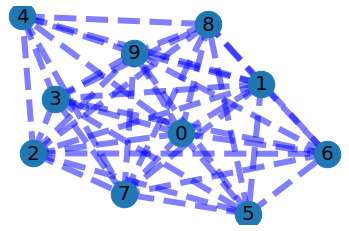

In [356]:
G = nx.Graph(friendWeights)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5] # Weak ties are less than or below .5 and strong ties are above .5 
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

plt.axis("off")
plt.show()

#Numbers correspond to names in the network